In [1]:
#Basit Lineer Regresyon

In [2]:
"""
y = b0 + b1*x
x : feature
y : target variable (response)
b1 : coefficient
b0 : intercept
"""

'\ny = b0 + b1*x\nx : feature\ny : target variable (response)\nb1 : coefficient\nb0 : intercept\n'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset = pd.read_csv('mydata/Salary_Data.csv')
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
dataset.shape

(30, 2)

In [6]:
X = dataset.drop(['Salary'], axis = True)
y = dataset['Salary']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24, 1), (6, 1), (24,), (6,))

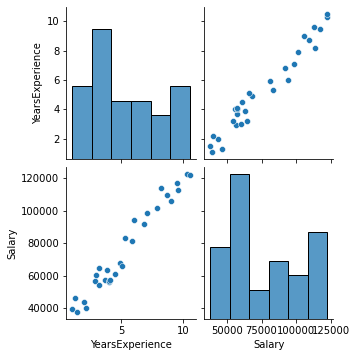

In [9]:
sns.pairplot(dataset)

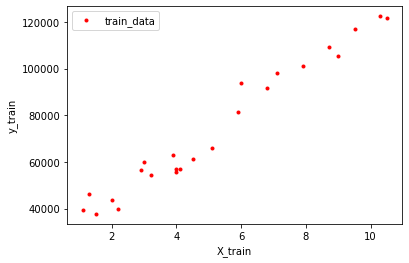

In [10]:
plt.plot(X_train, y_train, 'r.', label = 'train_data')
plt.xlabel('X_train')
plt.ylabel('y_train')
plt.legend()
plt.show()

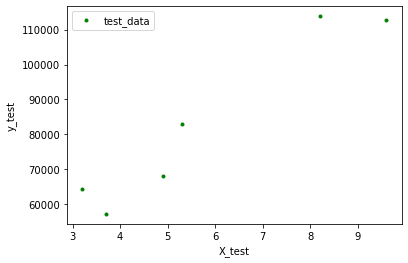

In [11]:
plt.plot(X_test, y_test, 'g.', label = 'test_data')
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.legend()
plt.show()

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = regressor.predict(X_test).round(1)

In [14]:
hesaplama = pd.DataFrame(np.c_[y_test, y_pred], columns = ['Original Salary', 'Predicted Salary'])
hesaplama

,Original Salary,Predicted Salary
0,112635.0,115790.2
1,67938.0,71498.3
2,113812.0,102596.9
3,83088.0,75267.8
4,64445.0,55477.8
5,57189.0,60189.7


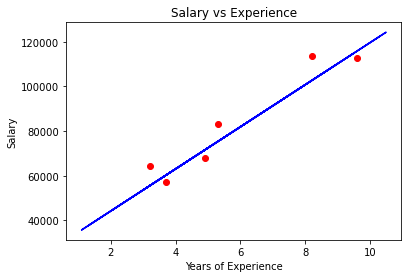

In [15]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [16]:
hesaplama

,Original Salary,Predicted Salary
0,112635.0,115790.2
1,67938.0,71498.3
2,113812.0,102596.9
3,83088.0,75267.8
4,64445.0,55477.8
5,57189.0,60189.7


In [17]:
#Polynomial Linear Regression

In [18]:
"""
y = a + bx + cx^2 + ... + nx^n + ...
"""

'\ny = a + bx + cx^2 + ... + nx^n + ...\n'

In [19]:
dataset = pd.read_csv('mydata/Position_Salaries.csv')
dataset.head(10)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [20]:
dataset = dataset.drop(['Position'], axis = True)

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Level   10 non-null     int64
 1   Salary  10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


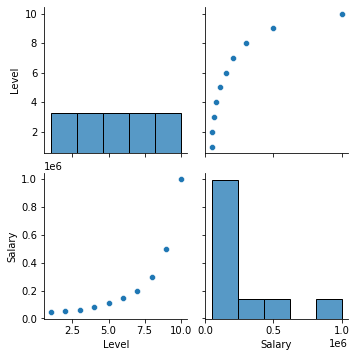

In [22]:
sns.pairplot(dataset)

In [23]:
X = dataset.drop(['Salary'], axis = True)
y = dataset['Salary']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8, 1), (2, 1), (8,), (2,))

In [26]:
#Simple Linear Regression ile ilk çözüm

In [27]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [28]:
print("Training Accuracy : ", lin_reg.score(X_train, y_train))
print("Testing Accuracy : ", lin_reg.score(X_test, y_test))

Training Accuracy :  0.6366049276570868
Testing Accuracy :  0.8451346684575975


In [29]:
#Polynomial Linear Regression ile 2. çözüm

In [31]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)
X_poly_test = poly_reg.transform(X_test)

In [32]:
print("Training Accuracy : ", lin_reg_2.score(X_poly, y_train))
print("Testing Accuracy :", lin_reg_2.score(X_poly_test, y_test))

Training Accuracy :  0.9995857211026754
Testing Accuracy : 0.9714666803841844


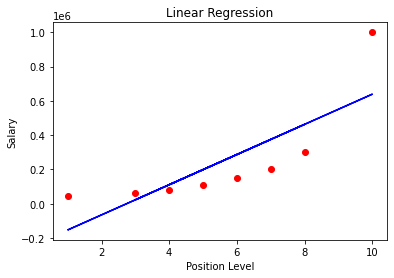

In [33]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, lin_reg.predict(X_train), color = 'blue')
plt.title('Linear Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

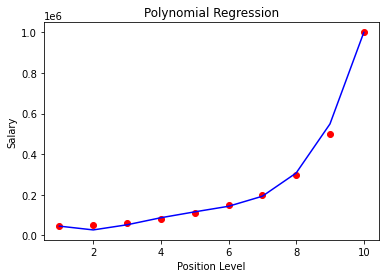

In [35]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()